<a href="https://colab.research.google.com/github/JayellWolfe/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/Jessica_Williams_W4D3__High_Dimensional_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd

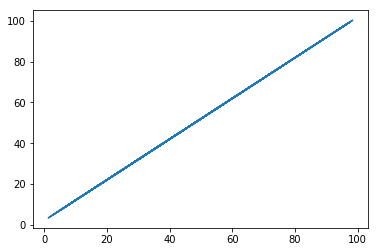

In [2]:
def function(x):
  return x+2

def not_function(x):
  return (x+2,x)

N = 50
x = np.random.rand(N)*100
y = function(x)

plt.plot(x, y)

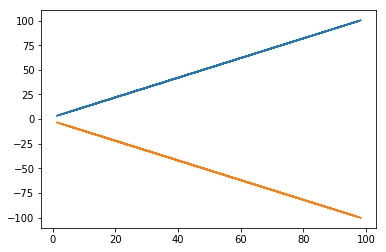

In [3]:
plt.plot(x,y) 
plt.plot(x,-y)

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

Relation 2 is a function because it will pass a vertical line test 

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

m = input 3, output 3
n= input 4

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

In [4]:
#f(x)=f(i+j)=f(i)+f(j)
def p(x):
  return [x[0]+3*x[1], 2*x[1]-x[0]]

i=[1,0]
j=[0,1]

print(p(i))
print(p(j))

P_Matrix=[p(i),p(j)]

[1, -1]
[3, 2]


In [5]:
def q(x):
  return[4*x[0]+x[1]+2*x[2],
        2*x[1]-x[0]+3*x[2],
         5*x[0]-2*x[2]+x[2]
        ]

i=[1,0,0]
j=[0,1,0]
k=[0,0,1]

print(q(i))
print(q(j))
print(q(k))

Q_Matrix=[q(i),q(j),q(k)]

print(np.transpose(Q_Matrix))

[4, -1, 5]
[1, 2, 0]
[2, 3, -1]
[[ 4  1  2]
 [-1  2  3]
 [ 5  0 -1]]


## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [6]:
test=np.array([3,8])

print(p(test))

test=np.array([[3],[8]])
print(test.shape)

print(np.multiply(P_Matrix,test))

[27, 13]
(2, 1)
[[ 3 -3]
 [24 16]]


# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

Eigenvectors will not change direction but will scale by eigenvalues 

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

In [7]:
df=pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv')

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [0]:
new_df=df.iloc[:,0:4]

In [10]:
from numpy import array
from sklearn.decomposition import PCA

# define a matrix
X = array([[1, 2], [3, 4], [5, 6]])
print("Data: \n", new_df)

# create the PCA instance
pca = PCA(2)

# fit on data
pca.fit(new_df)

# access values and vectors
print("\n Eigenvectors: \n", pca.components_)
print("\n Eigenvalues: \n",pca.explained_variance_)

# transform data
B = pca.transform(new_df)
print("\n Projected Data: \n", B)

Data: 
      sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
5             5.4          3.9           1.7          0.4
6             4.6          3.4           1.4          0.3
7             5.0          3.4           1.5          0.2
8             4.4          2.9           1.4          0.2
9             4.9          3.1           1.5          0.1
10            5.4          3.7           1.5          0.2
11            4.8          3.4           1.6          0.2
12            4.8          3.0           1.4          0.1
13            4.3          3.0           1.1          0.1
14            5.8          4.0           1.2          0.2
15            5.7          4.4           1.5          0.4
16    

In [11]:
type(B)

numpy.ndarray

In [12]:
B[0]

array([-2.68420713,  0.32660731])

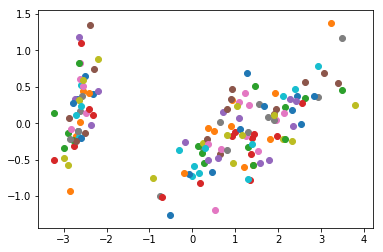

In [13]:
for point in B:
  plt.scatter(point[0], point[1])
plt.show()

# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

<center>![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)</center>

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)